## 1<span style='color:red'>|</span> Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot , plot_decision_regions

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.decomposition import PCA

%matplotlib inline

sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

## 1<span style='color:red'>|</span> Import Data

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1776,12:10:00,Thursday,Unknown,Male,NaN,NaN,NaN,Automobile,Owner,NaN,No defect,Office areas,other,Tangent road with mountainous terrain and,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8823,19:19:00,Friday,Unknown,Female,Junior high school,Employee,5-10yr,Stationwagen,Owner,Unknown,NaN,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - lights lit,Raining,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
8122,12:59:00,Tuesday,Over 51,Male,Junior high school,Employee,5-10yr,Public (13?45 seats),Owner,NaN,No defect,Recreational areas,other,NaN,Crossing,Asphalt roads,Dry,Daylight,Normal,Collision with pedestrians,2,1,Going straight,Driver or rider,Male,31-50,2,NaN,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
10451,18:15:00,Thursday,Under 18,Male,Junior high school,Employee,Above 10yr,Other,Owner,NaN,NaN,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Unknown,Asphalt roads,Wet or damp,Darkness - lights lit,Raining,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
4328,15:00:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Governmental,NaN,NaN,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,4,Going straight,Pedestrian,Male,31-50,3,Self-employed,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the left,Slight Injury


## 3<span style='color:red'>|</span> Exploratory Data Analysis

In [6]:
df.shape

(12316, 32)

In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
col ={'Time':'time',
      'Day_of_week':'day_of_week',
      'Age_band_of_driver':'driver_age',
      'Sex_of_driver':'driver_sex',
      'Educational_level':'education_level',
      'Vehicle_driver_relation':'vehicle_driver_relation',
      'Driving_experience':'driving_experience',
      'Type_of_vehicle':'vehicle_type',
      'Owner_of_vehicle':'vehicle_owner',
      'Service_year_of_vehicle':'service_year',
      'Defect_of_vehicle':'vehicle_defects',
      'Area_accident_occured':'accident_area',
      'Lanes_or_Medians':'lanes',
      'Road_allignment':'road_allignment',
      'Types_of_Junction':'junction_type',
      'Road_surface_type':'surface_type',
      'Road_surface_conditions':'surface_condition',
      'Light_conditions':'light_conditions',
      'Weather_conditions':'weather_conditions',
      'Type_of_collision':'collision_type', 
      'Number_of_vehicles_involved':'vehicles_involved',
      'Number_of_casualties':'casualties',
      'Vehicle_movement':'vehicle_movement',
      'Casualty_class':'casualty_class',
      'Sex_of_casualty':'casualty_sex',
      'Age_band_of_casualty':'casualty_age',
      'Casualty_severity':'casualty_severity',
      'Work_of_casuality':'casualty_work',
      'Fitness_of_casuality':'casualty_fitness',
      'Pedestrian_movement':'pedestrian_movement',
      'Cause_of_accident':'accident_cause',
      'Accident_severity':'accident_severity'}

df.rename(columns=col,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   education_level          11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defects          7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [10]:
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
education_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [12]:
df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
education_level             741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defects            4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
surface_condition             0
light_conditions              0
weather_conditions            0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [13]:
  df.duplicated().sum()

0

In [14]:
df.nunique()

time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
education_level               7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defects               3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
surface_condition             4
light_conditions              4
weather_conditions            9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [17]:
for col in df.columns:
    print(f'Unique values in {col}:')
    print(df[col].unique(),'\n')

Unique values in time:
['17:02:00' '01:06:00' '14:15:00' ... '07:24:00' '19:18:00' '02:47:00'] 

Unique values in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique values in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique values in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique values in education_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique values in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique values in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique values in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Uni

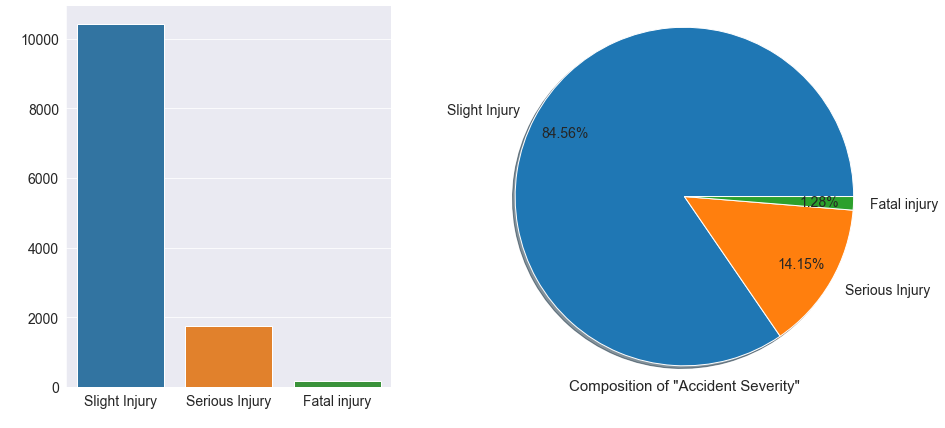

In [18]:
#check the target
plt.figure(figsize=(14,7))

ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df['accident_severity'])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

ax2 = plt.subplot(1,2,2)
plt.pie(df['accident_severity'].value_counts(),
       labels=list(df['accident_severity'].unique()),
       autopct='%1.2f%%',
       pctdistance=0.8,
       shadow=True,
       radius=1.3,
       textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [22]:
fig = px.treemap(df,path=['accident_cause'], width=800, height=400)
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25))
fig.show()